## Overview The Dataset

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

import os
print(os.listdir("./archive"))

['one-indexed-files-notrash_test.txt', 'Garbage classification', 'zero-indexed-files.txt', 'garbage classification', 'one-indexed-files-notrash_train.txt', 'one-indexed-files.txt', 'one-indexed-files-notrash_val.txt']


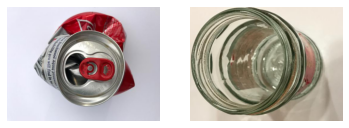

In [129]:
filepath = "./archive/garbage classification/Garbage classification/metal/metal100.jpg"
filepath2 = "./archive/garbage classification/Garbage classification/glass/glass21.jpg"

img1 = Image.open(filepath)
img2 = Image.open(filepath2)
img_size = 128
plt.subplot(1, 2, 1)
plt.imshow(img1)
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(img2)
plt.axis("off")
plt.show()

## Logistic Regression

In [ ]:
def sigmoid(z):
    """
    return the sigmoid of z
    """

    gz = 1/(1 + np.exp(-z))
    
    return gz

In [ ]:
def costFunctionReg(X, y, theta, Lambda):
    """
    Take in numpy array of  data X, labels y and theta, to return the regularized cost function and gradients
    of the logistic regression classifier
    """
    
    # number of training examples 
    m = X.shape[0]
        
    # vector of the model predictions for all training examples      
    h = sigmoid(np.dot(X, theta))
    
    error = (-y * np.log(h)) - ((1 - y)*np.log(1-h))
    
    # cost function without regularization term
    cost = sum(error)/m
    
    # add regularization term to the cost function
    regCost = cost + Lambda/(2*m) * sum(theta[1:]**2)
    
    # gradient of theta_0
    grad_0 = (1/m) * np.dot(X.transpose(),(h - y))[0]
    
    # vector of gradients of theta_j from j=1:n (adding the regularization term of the gradient)
    grad = (1/m) * np.dot(X.transpose(),(h - y))[1:] + (Lambda/m)* theta[1:]
       
    # all gradients in a column vector shape
    grad_all = np.append(grad_0,grad)
    grad_all = grad_all.reshape((len(grad_all), 1))
    
    return regCost[0], grad_all

In [ ]:
def gradientDescent(X, y, theta, alpha, num_iters, Lambda):
    """
    Take in numpy array X, y and theta and update theta by taking num_iters gradient steps
    with learning rate of alpha
    Lambda is the regularization term
    return theta and the list of the cost of theta during each iteration
    """
    
    J_history =[]
    
    for i in range(num_iters):
        
        # call CostFunctionReg 
        cost, grad = costFunctionReg(X, y, theta, Lambda)
        
        # update theta
        theta = theta - (alpha * grad)
        
        J_history.append(cost)
    
    return theta , J_history

In [ ]:
X_train = []
y_train = []

# number of features
n = X_train.shape[1]

# Inicialize vector theta = 0
initial_theta = np.zeros((n,1))

# Optimization hyper-parameters 
alpha = 0.01 # learning rate
num_iters = 800
Lambda = 0.1

theta , J_history = gradientDescent(X_train, y_train, initial_theta, alpha, num_iters, Lambda)

In [ ]:
plt.plot(J_history)  # All classifiers
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")
plt.show()

## Accuracy

In [ ]:
def classifierPredict(theta,X):
    """
    take in numpy array of theta and X and predict the class 
    """
    predictions = X.dot(theta)
    
    return predictions>0